In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os
from sklearn.model_selection import GridSearchCV
from imutils import paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
def imgm(img,size=(32,32)):
    img=cv2.resize(img,size)
    pix=img.flatten()
    return pix

In [6]:
path=list(paths.list_images("/content/drive/MyDrive/Colab Notebooks/DataSets"))
IMG=[]
label=[]

for (i, image_path) in enumerate(path):
    image = cv2.imread(image_path)
    lab = image_path.split(os.path.sep)[-2].split(".")[0]
    # extract raw pixel intensity "features
    pixels = imgm(image)
    IMG.append(pixels)
    label.append(lab)

x = np.array(IMG)
y = np.array(label)


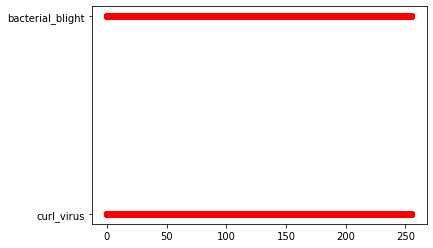

In [7]:
_=plt.plot(x,y,"ro")


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
sv= KNeighborsClassifier(algorithm='auto')
parameters_KNN = {'n_neighbors': (1,10, 1),'leaf_size': (20,40,1),'p': (1,2),'weights': ('uniform', 'distance'),'metric': ('minkowski', 'chebyshev')}
model=GridSearchCV(estimator=sv,param_grid=parameters_KNN,scoring = 'accuracy',n_jobs = -1,cv = 5)


In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
model.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 10, 1), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [14]:
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.9479768786127167

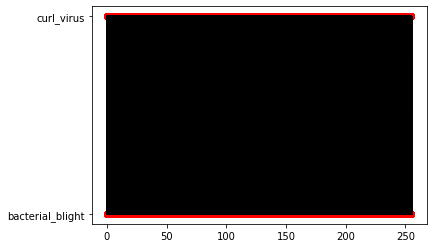

In [15]:
_=plt.plot(xtest,ytest,"ro",xtest,pred,"--k")

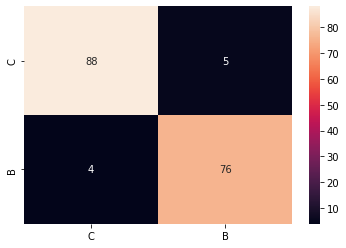

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as ss
con=confusion_matrix(ytest,pred)
imgs=ss.heatmap(con,annot=True,yticklabels="CB",xticklabels="CB")


In [19]:
figure = imgs.get_figure()    
figure.savefig('confusion knn .png', dpi=400)

In [20]:
from sklearn.metrics import classification_report
report=classification_report(ytest,pred)
print(report)

                  precision    recall  f1-score   support

bacterial_blight       0.96      0.95      0.95        93
      curl_virus       0.94      0.95      0.94        80

        accuracy                           0.95       173
       macro avg       0.95      0.95      0.95       173
    weighted avg       0.95      0.95      0.95       173

